In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

In [15]:
df = pd.read_csv('/home/kanisk/Desktop/Breast Cancer Detection/breast-cancer-wisconsin.data')
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape','marginal_adhesion', 'single_epithelial_size', 'bare_nuclei','bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv('/home/kanisk/Desktop/Breast Cancer Detection/breast-cancer-wisconsin.data',names=names)

In [16]:
advert_report = sv.analyze(df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [17]:
advert_report.show_html('cancer1.html')

Report cancer1.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [18]:
#importing Sklearn libraries
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [19]:
df.drop(['id'], 1, inplace=True)

In [20]:
df

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [9]:
df.dtypes

clump_thickness            int64
uniform_cell_size          int64
uniform_cell_shape         int64
marginal_adhesion          int64
single_epithelial_size     int64
bare_nuclei               object
bland_chromatin            int64
normal_nucleoli            int64
mitoses                    int64
class                      int64
dtype: object

In [22]:
df["bare_nuclei"] = df["bare_nuclei"].astype(float).astype(int)
print(df.dtypes)

clump_thickness           int64
uniform_cell_size         int64
uniform_cell_shape        int64
marginal_adhesion         int64
single_epithelial_size    int64
bare_nuclei               int64
bland_chromatin           int64
normal_nucleoli           int64
mitoses                   int64
class                     int64
dtype: object


In [23]:
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bare_nuclei  \
count         699.000000              699.000000   699.000000   
mean            2.806867                3.216023     3.463519   
std             2.855379                2.214300     3.640708   
min             1.000000                1.000000     0.000000   
25%             1.000000                2.000000     1.000000   
50%             1.000000

<AxesSubplot:>

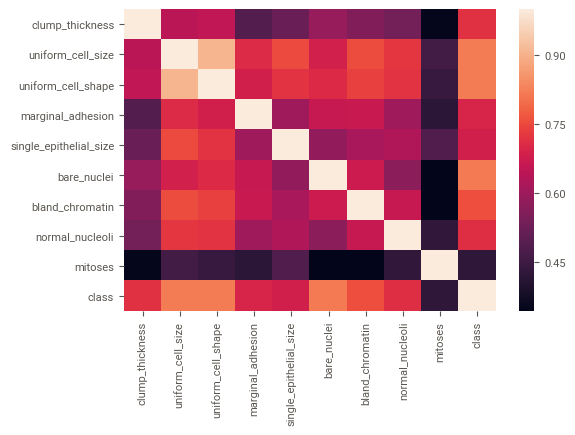

In [24]:
# Calculate correlations
corr = df.corr()
# Heatmap
sns.heatmap(corr)

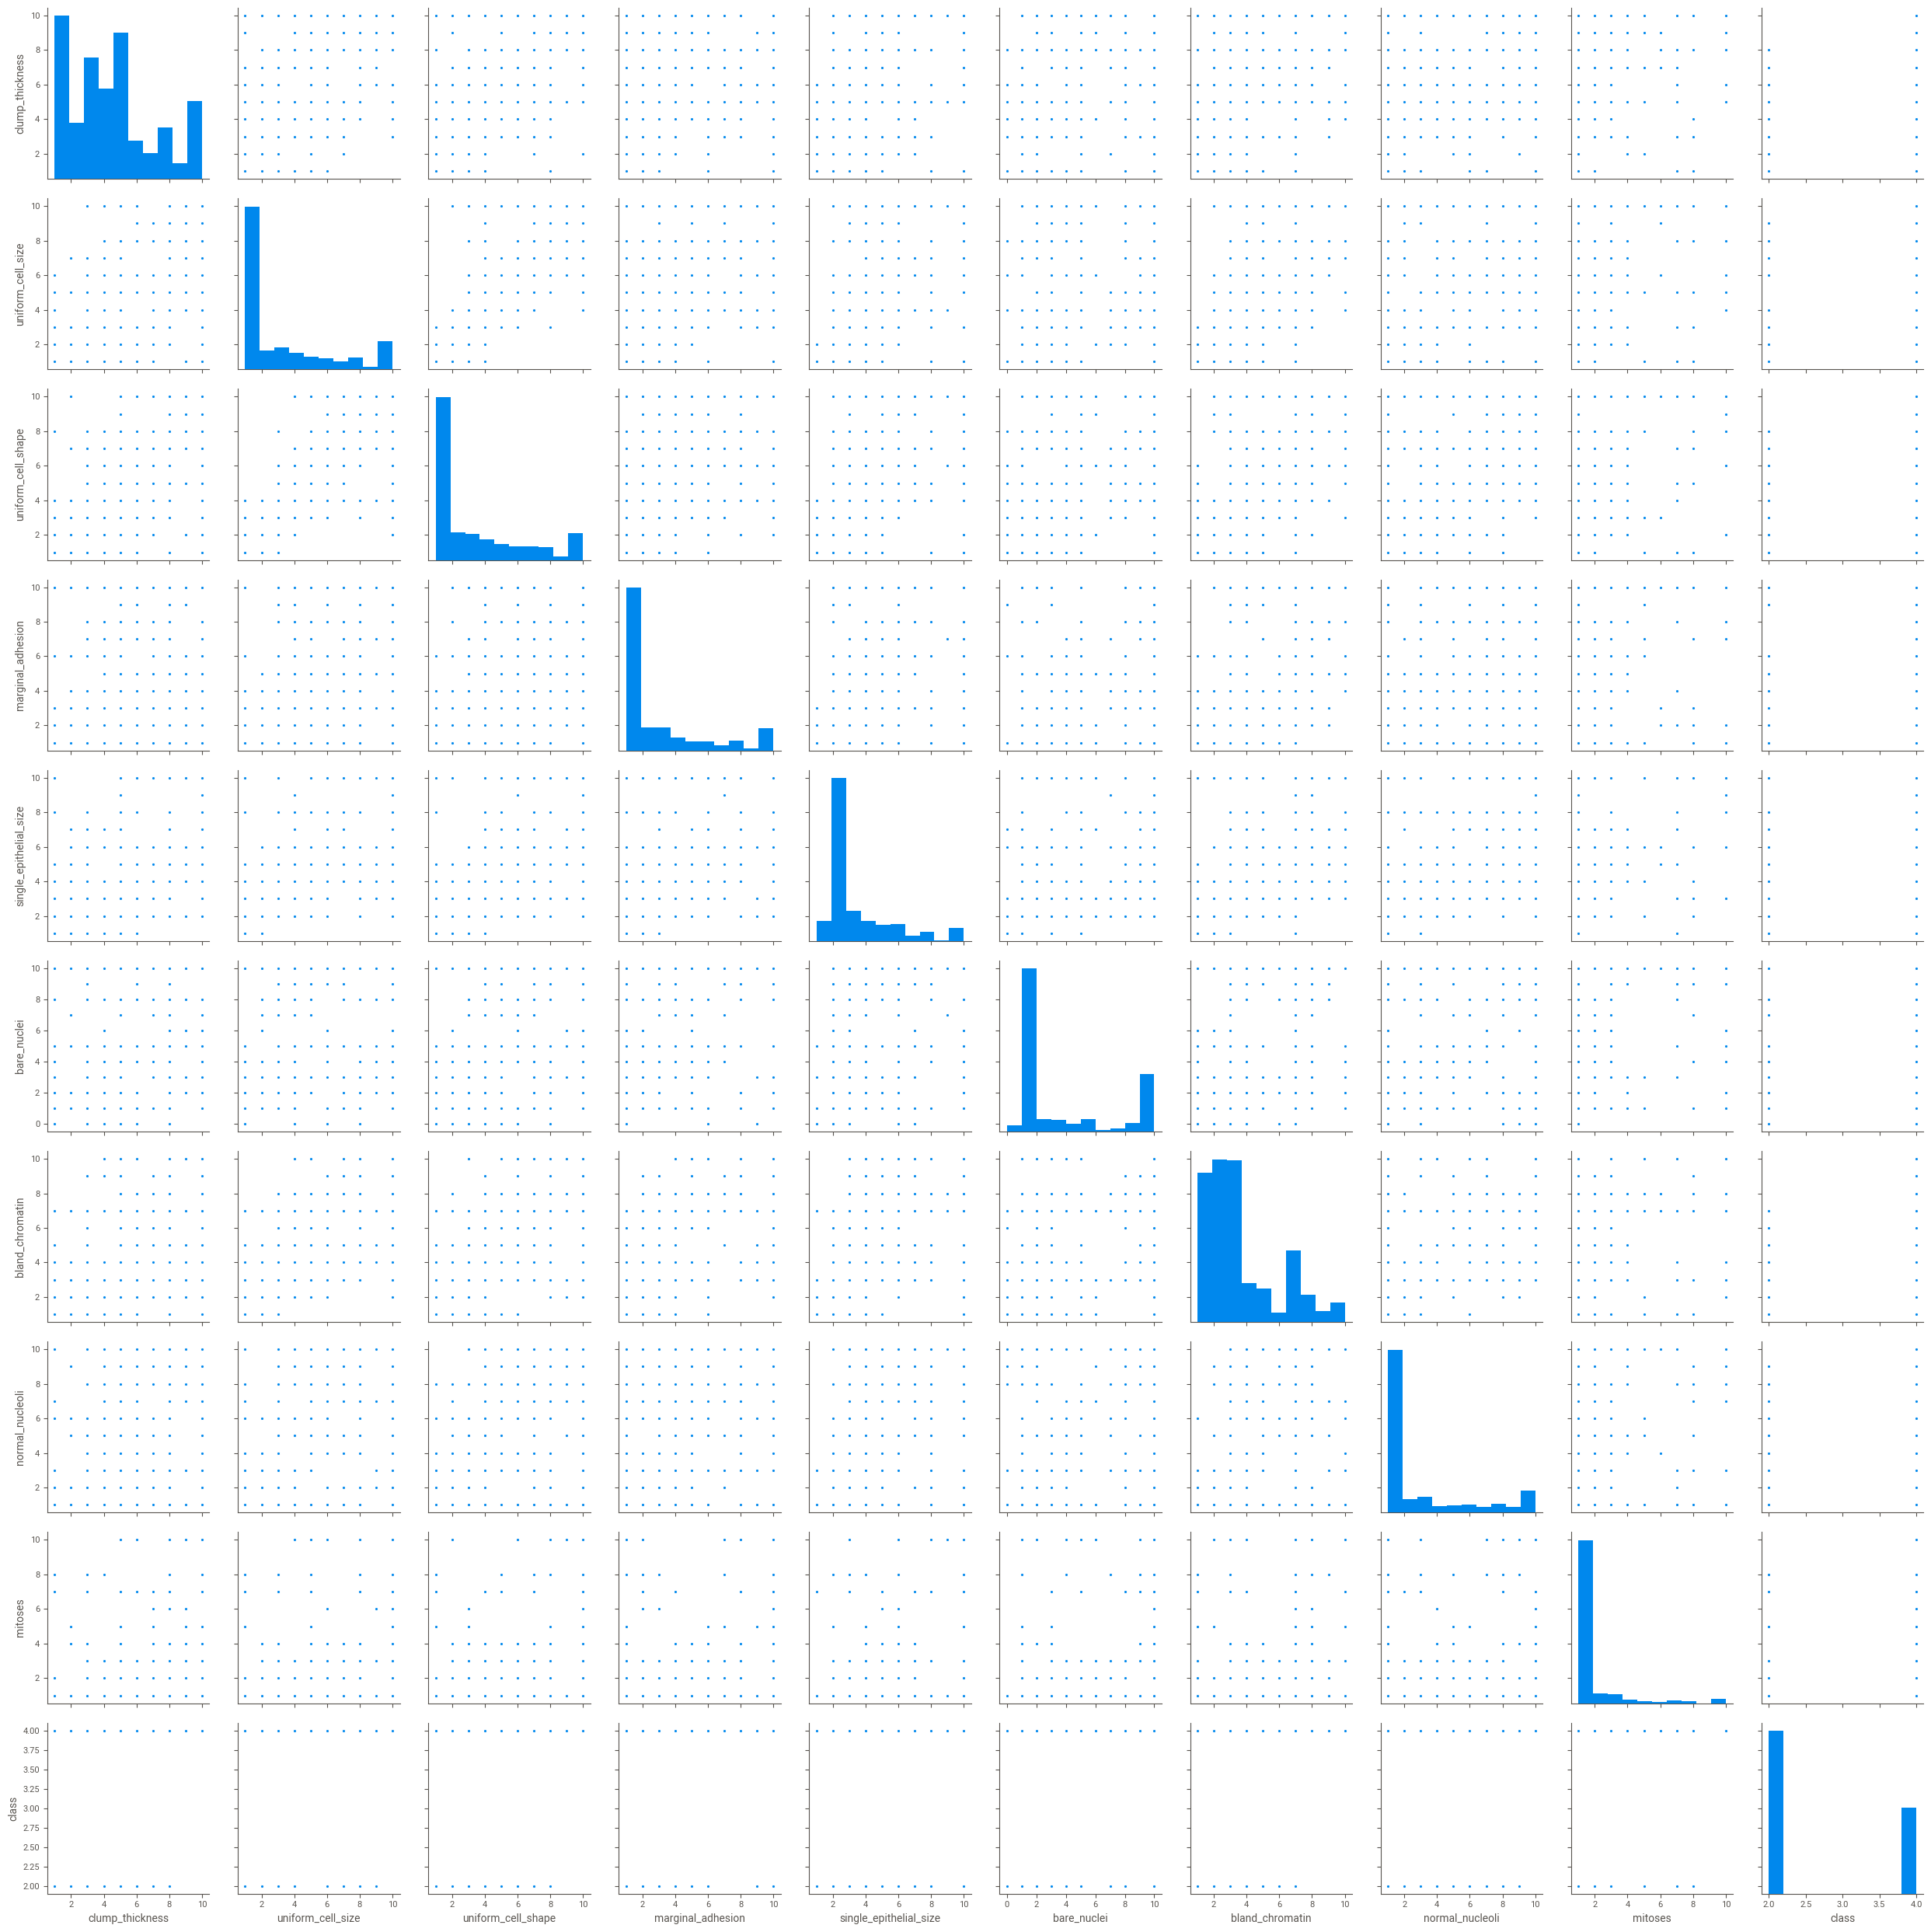

In [43]:
g = sns.pairplot(df)

In [25]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
# Testing Options
seed = 8
scoring = 'accuracy'

In [34]:
#SVM Model
from sklearn import svm
clf = svm.SVC(kernel='linear') 
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [36]:
#FULL REPORT FOR Support-Vector Machine
print("Full Report",metrics.classification_report(y_test,y_pred))

Full Report               precision    recall  f1-score   support

           2       0.97      0.99      0.98        92
           4       0.98      0.94      0.96        48

   micro avg       0.97      0.97      0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



In [41]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)
# Train the model using the training sets
model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [42]:
#FULL REPORT FOR Support-Vector Machine
print("Full Report",metrics.classification_report(y_test,y_pred))

Full Report               precision    recall  f1-score   support

           2       0.97      0.99      0.98        92
           4       0.98      0.94      0.96        48

   micro avg       0.97      0.97      0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

